In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("Copper_Set.csv")
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


## Data Type Manipulations

In [5]:
# Date is in the format of year month and date - the format should be %y %m %d
data['item_date'] = pd.to_datetime(data['item_date'], format='%Y%m%d', errors='coerce')
data['delivery date'] = pd.to_datetime(data['delivery date'], format='%Y%m%d', errors='coerce')
data.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [6]:
# As the 'id' column is unique identifier for every column, it is transaction id- we can remove for now
data.drop('id', axis=1, inplace=True ) 

In [7]:
# 'quantity tons' should be numeric, but it is in 'object' type. so, conver it to numeric
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors= 'coerce')

In [8]:
# 'country', 'status', 'status','application', 'product_ref','customer' are categorial columns, so transform them
data['customer'] = data['customer'].astype('category')
data['country'] = data['country'].astype('category')
data['status'] = data['status'].astype('category')
data['item type'] = data['item type'].astype('category')
data['application'] = data['application'].astype('category')
data['product_ref'] = data['product_ref'].astype('category')

In [9]:
# calculate the time gap between the order and delivery date
data['duration'] = (data['delivery date'] - data['item_date']).dt.days

## Data Abnormalities

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5874.925754,2.349081e+06,-2000.00,10.970298,30.364635,67.160612,1.000000e+09
thickness,181672.0,2.564827,6.572321e+00,0.18,0.700000,1.500000,3.000000,2.500000e+03
width,181673.0,1295.286724,2.616318e+02,1.00,1180.000000,1250.000000,1500.000000,2.990000e+03
selling_price,181672.0,1918.035505,3.317956e+05,-1160.00,669.000000,812.000000,953.000000,1.000010e+08
duration,181667.0,59.991231,4.681328e+01,-689.00,28.000000,59.000000,97.000000,4.480000e+02


In [11]:
# In quantity tons and selling_price, some values are negative, but they shouldn't be
# replace the negative values with NaN

data['quantity tons'] = data['quantity tons'].apply(lambda x : np.NAN if x <=0 else x)
data['selling_price'] = data['selling_price'].apply(lambda x : np.NAN if x <=0 else x)

In [12]:
# deleting the rows with negative duration, as the duration can not be nagative

data.drop(index= data[data['duration'] < 0].index, inplace=True)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,165563.0,6134.262857,2.457640e+06,0.00001,11.38167,30.541302,67.051232,1.000000e+09
thickness,165565.0,2.622289,6.841273e+00,0.18000,0.74000,1.500000,3.000000,2.500000e+03
width,165566.0,1300.924220,2.620145e+02,1.00000,1180.00000,1250.000000,1500.000000,2.990000e+03
selling_price,165558.0,1427.590524,2.457683e+05,0.10000,677.00000,817.000000,958.000000,1.000010e+08
duration,165560.0,68.099070,3.928420e+01,0.00000,35.00000,65.000000,101.000000,4.480000e+02


## Handling Null values

In [14]:
data.isnull().mean()*100

item_date         0.001812
quantity tons     0.001812
customer          0.000604
country           0.016912
status            0.001208
item type         0.000000
application       0.014496
thickness         0.000604
width             0.000000
material_ref     43.766232
product_ref       0.000000
delivery date     0.001812
selling_price     0.004832
duration          0.003624
dtype: float64

In [15]:
# In the material_ref column, there are 42% null values and many values which started with zeros should be replaced with 
# null ( as prescribed in the ducumentation), we should drop that column. Even though that column is important, we 
# need , subject expect what we should do with the column missing. So, for now I am dropping that

data.drop('material_ref', axis=1, inplace= True)

In [16]:
data.isnull().sum()

item_date         3
quantity tons     3
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
delivery date     3
selling_price     8
duration          6
dtype: int64

In [17]:
# for the numeric columns, replace the null with mean

for column in data.select_dtypes('float').columns:
    data[column] = data[column].fillna(data[column].mean())

In [18]:
# for categorical columns, replace them with mode

for column in data.select_dtypes('category').columns:
    data[column] = data[column].fillna(data[column].mode().iloc[0])

In [19]:
# drop the null rows in the datetime columns
data.dropna(inplace=True)

In [20]:
data.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
duration         0
dtype: int64

## Encoding the categorial columns

In [21]:
data.select_dtypes('category')

,customer,country,status,item type,application,product_ref
0,30156308.0,28.0,Won,W,10.0,1670798778
1,30202938.0,25.0,Won,W,41.0,1668701718
5,30202938.0,25.0,Won,W,41.0,1668701718
6,30209509.0,30.0,Draft,W,41.0,611993
8,30341428.0,38.0,Won,S,10.0,1668701376
...,...,...,...,...,...,...
181433,30227718.0,25.0,Lost,S,15.0,640665
181525,30161559.0,30.0,Lost,S,10.0,640665
181527,30161559.0,30.0,Lost,S,10.0,640665
181529,30161559.0,30.0,Lost,S,10.0,640665


In [22]:
data_1 = data.copy()

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data_1.select_dtypes('category').columns.values:
    data_1[i] = le.fit_transform(data_1[i])

In [24]:
data_1.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,49,3,7,5,4,2.00,1500.0,22,2021-07-01,854.0,91.0
1,2021-04-01,768.024839,285,0,7,5,17,0.80,1210.0,20,2021-04-01,1047.0,0.0
5,2021-04-01,225.790676,285,0,7,5,17,1.50,1265.0,20,2021-04-01,983.0,0.0
6,2021-04-01,3.522613,360,4,0,5,17,0.38,1125.0,2,2021-07-01,18.0,91.0
8,2021-04-01,69.071853,860,6,7,3,4,0.60,1275.0,18,2021-07-01,1363.0,91.0


In [25]:
# As we got the data from datetime columns, we can drop them
data_1.drop(['item_date', 'delivery date' ], axis=1, inplace=True)

## Handling Skewness

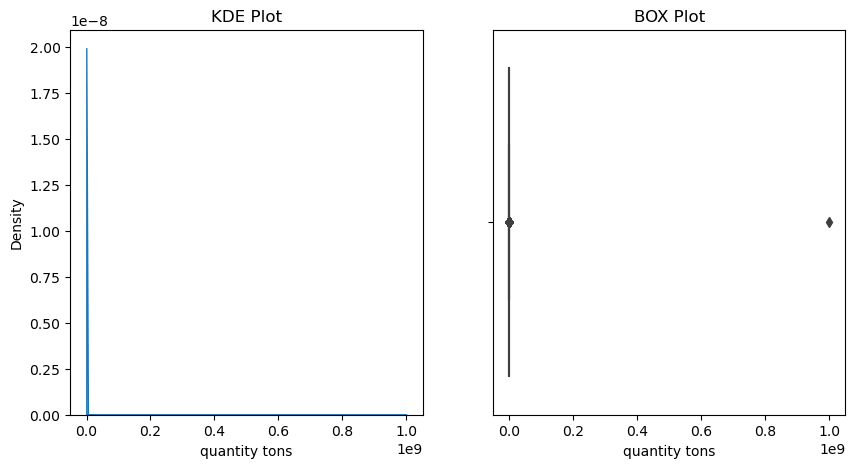

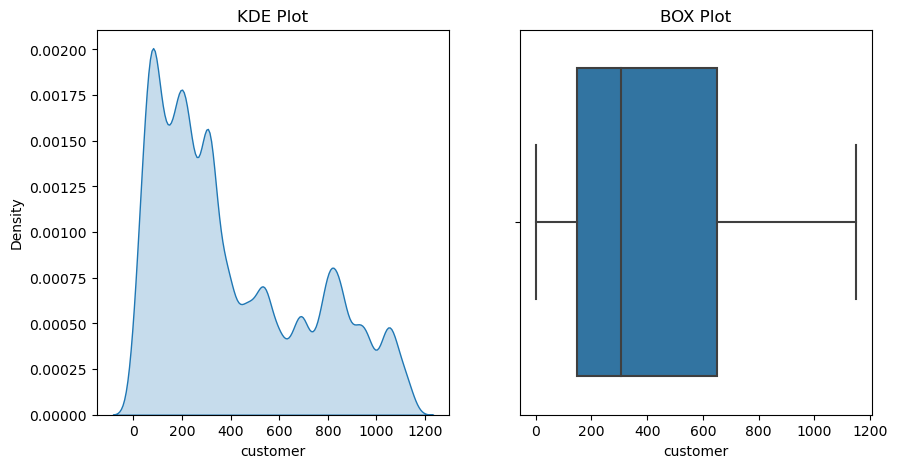

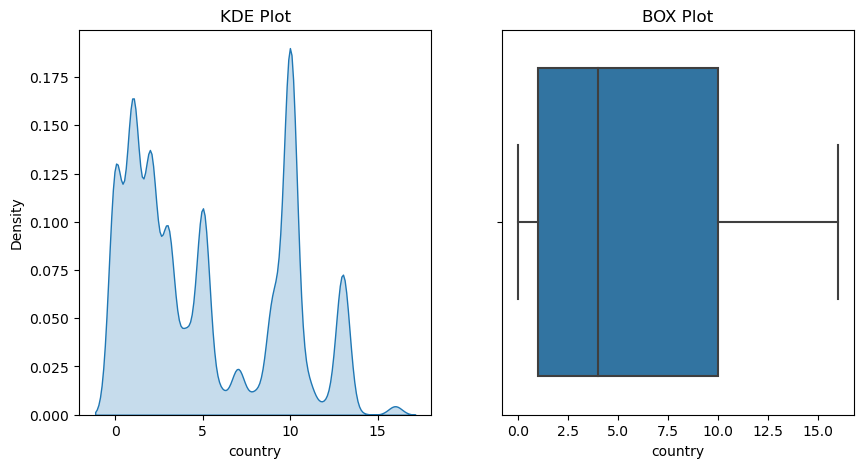

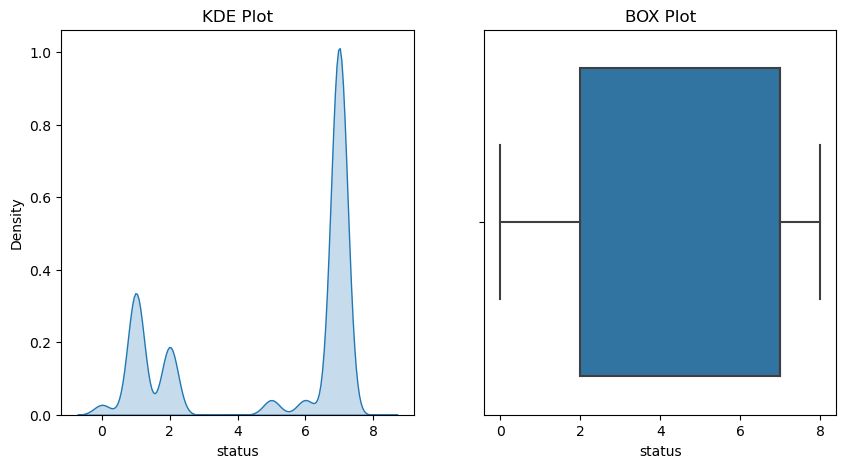

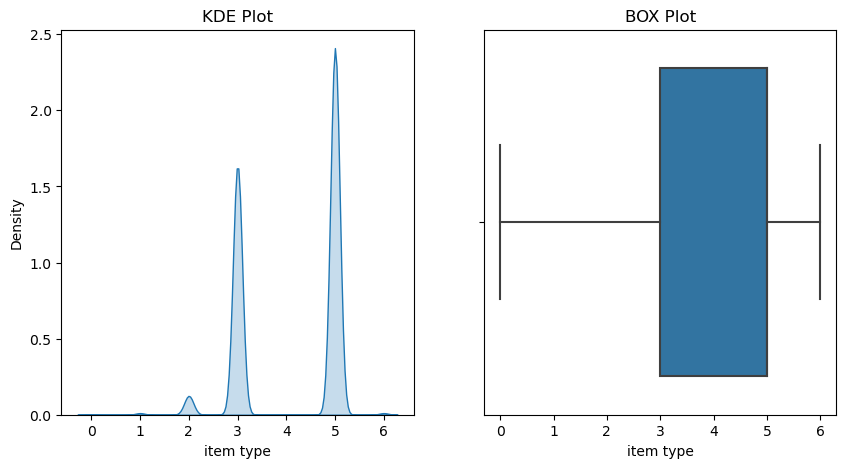

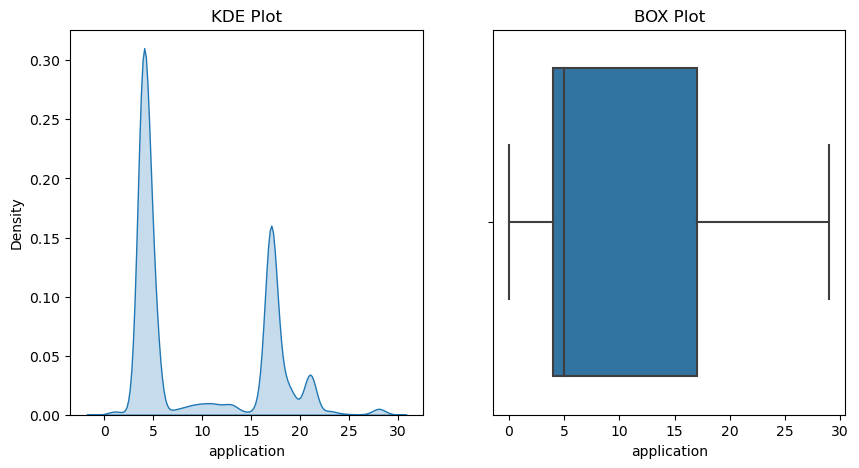

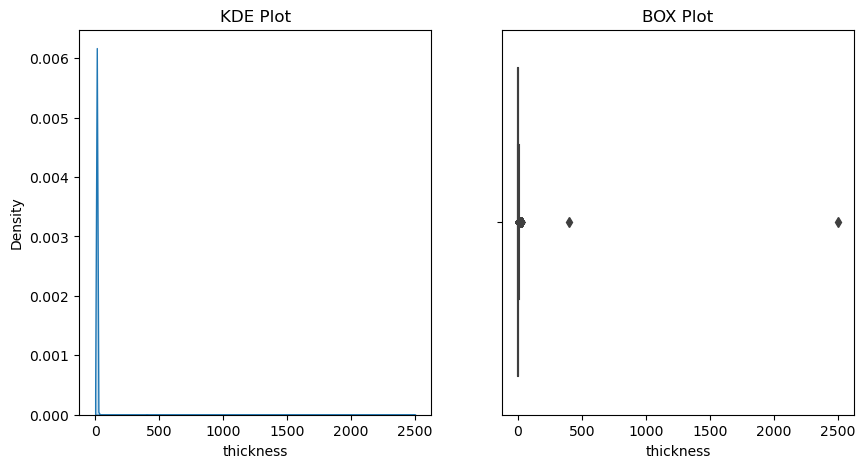

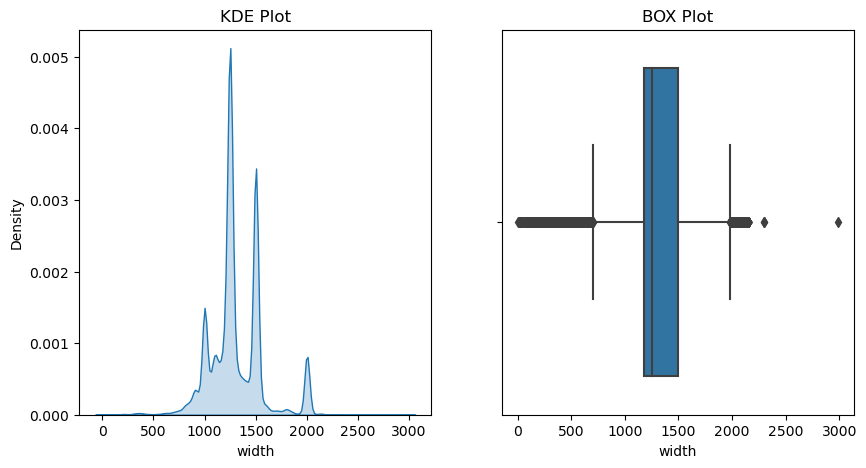

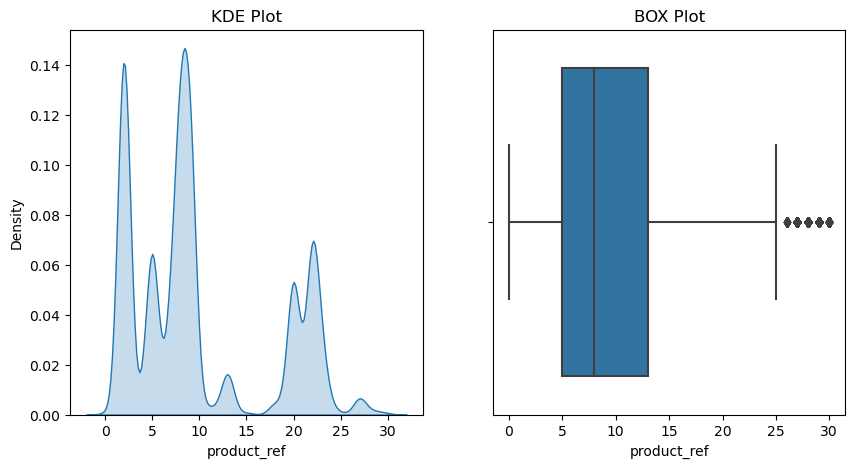

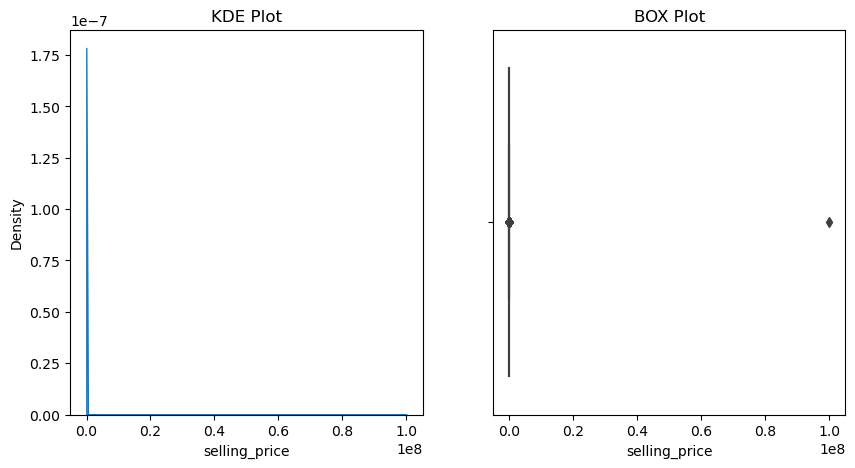

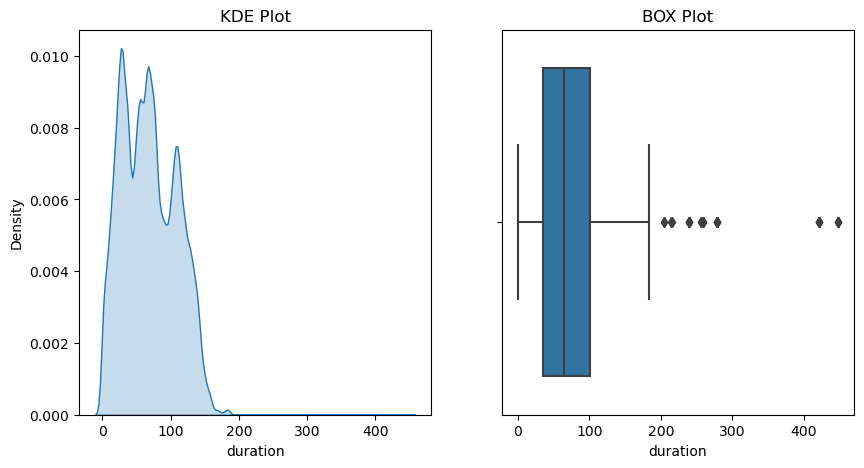

In [26]:
for col in data_1.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data_1[col], shade=True)
    plt.title("KDE Plot")

    plt.subplot(1,2,2)
    sns.boxplot(data_1[col])
    plt.title("BOX Plot")
    plt.show()

In [27]:
# 'quantity tons', 'thickness', 'selling_price' - these 3 are highly skewed
# Use transformation technique like log transformation to normalize the data

skewed_col = ['quantity tons', 'thickness', 'selling_price', 'duration' ]
data_1['quantity tons_log'] = np.log1p(data_1['quantity tons'])
data_1['thickness_log'] = np.log1p(data_1['thickness'])
data_1['selling_price_log'] = np.log1p(data_1['selling_price'])
data_1['duration_log'] = np.log1p(data_1['duration'])

In [28]:
data_1.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'duration', 'quantity tons_log', 'thickness_log', 'selling_price_log',
       'duration_log'],
      dtype='object')

In [29]:
# drop the original columns
data_1.drop(skewed_col, axis=1, inplace=True)

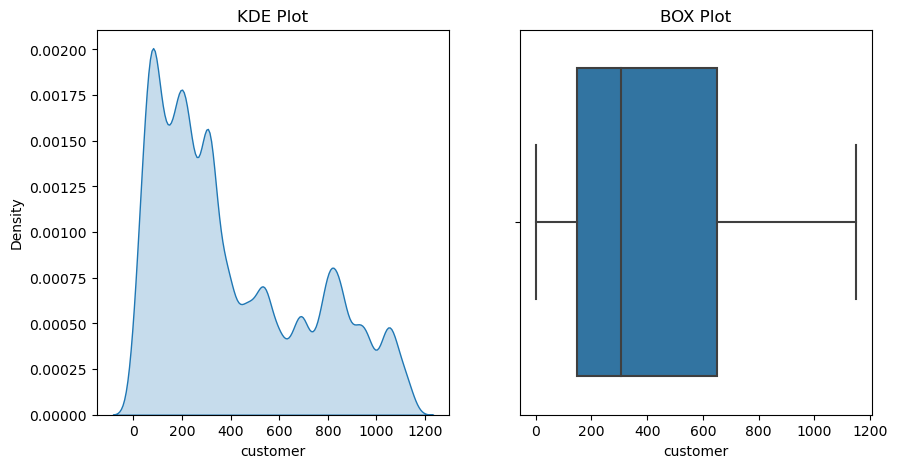

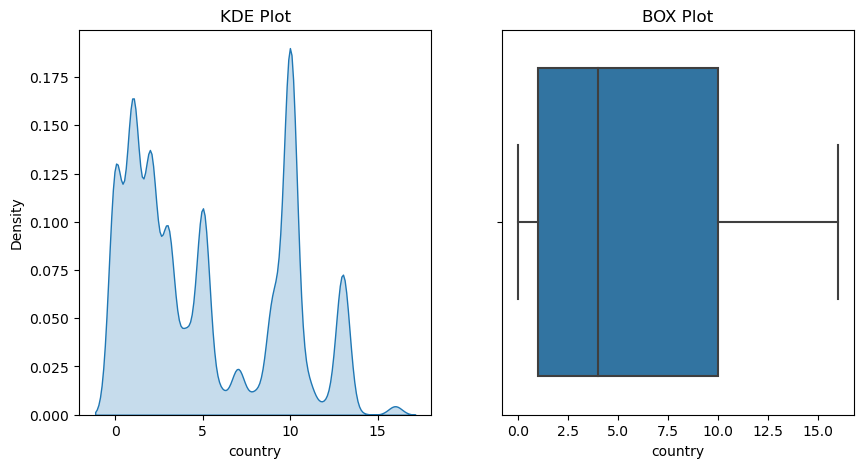

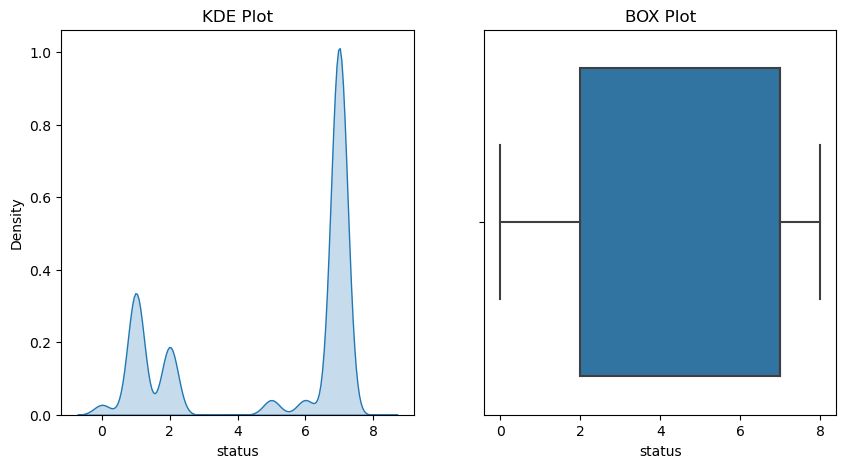

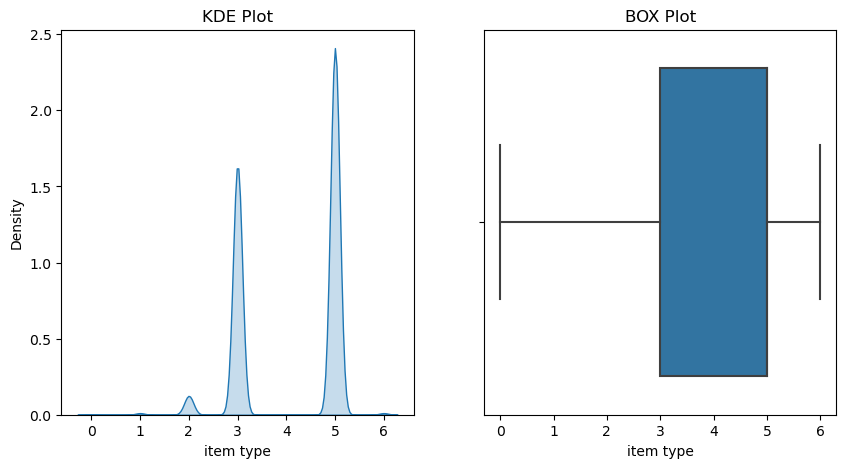

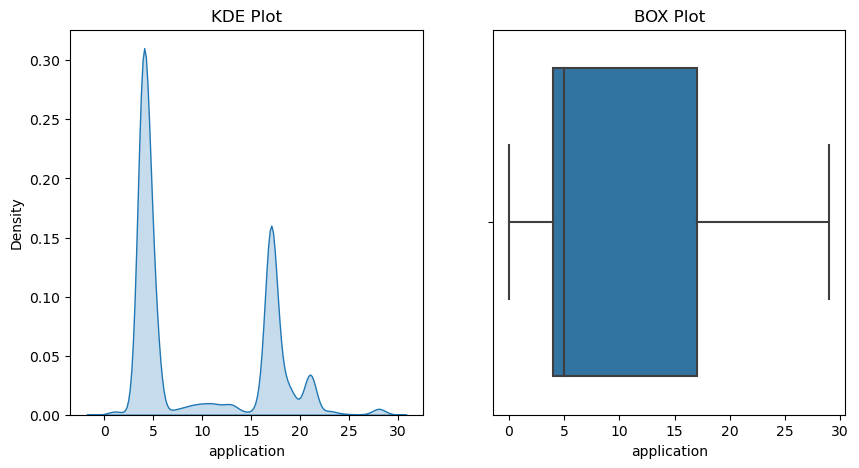

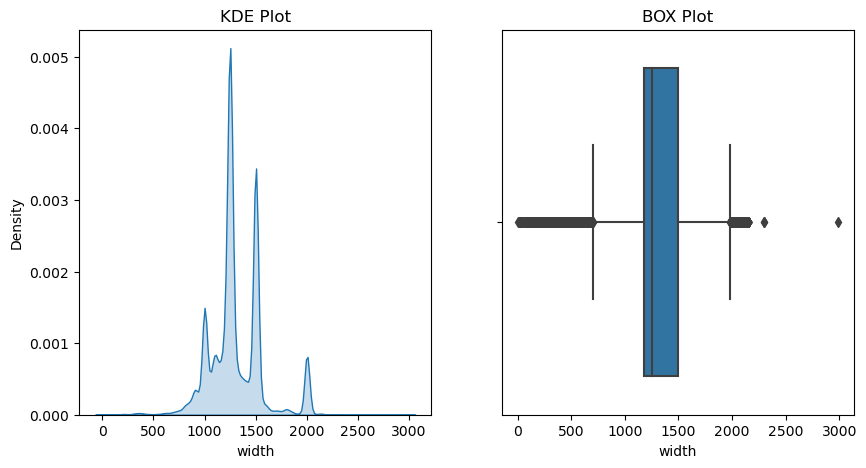

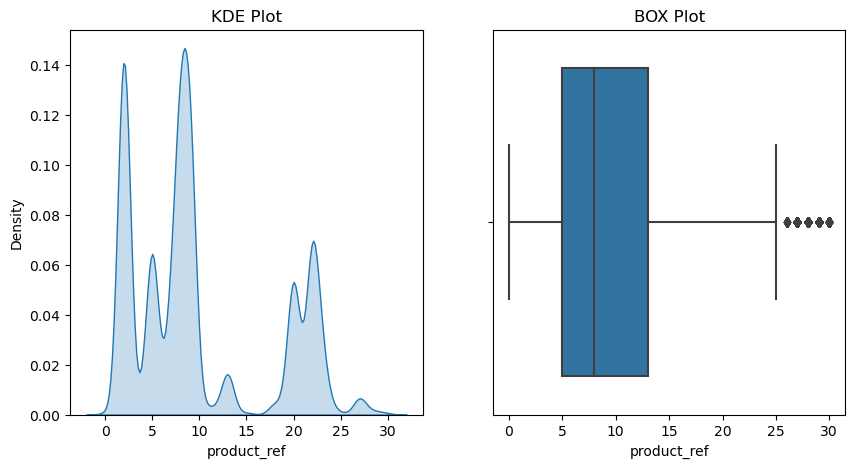

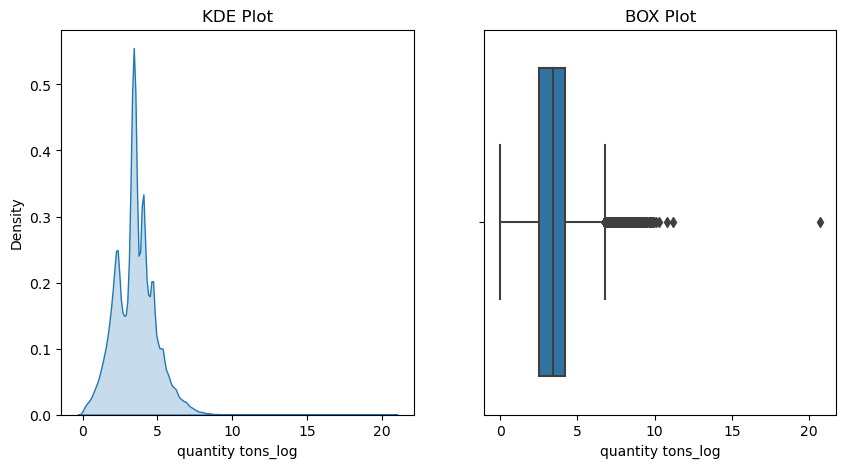

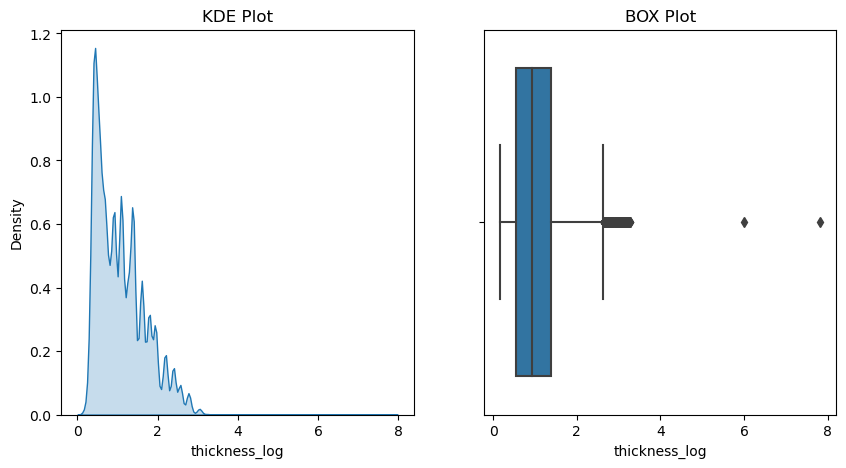

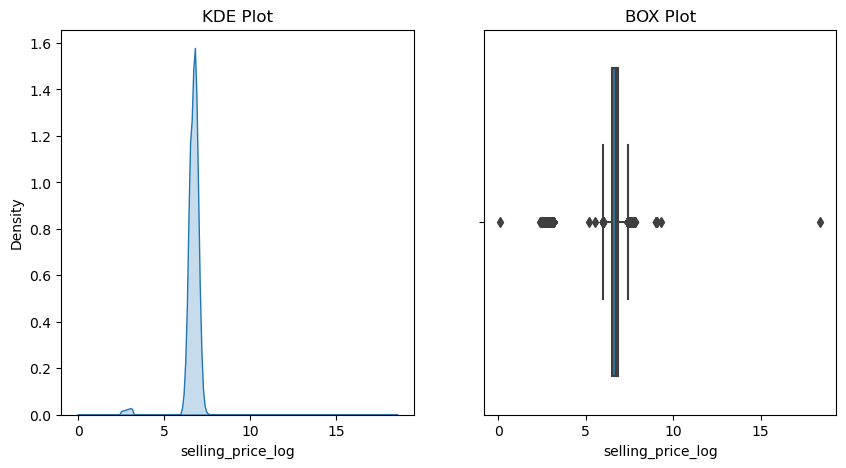

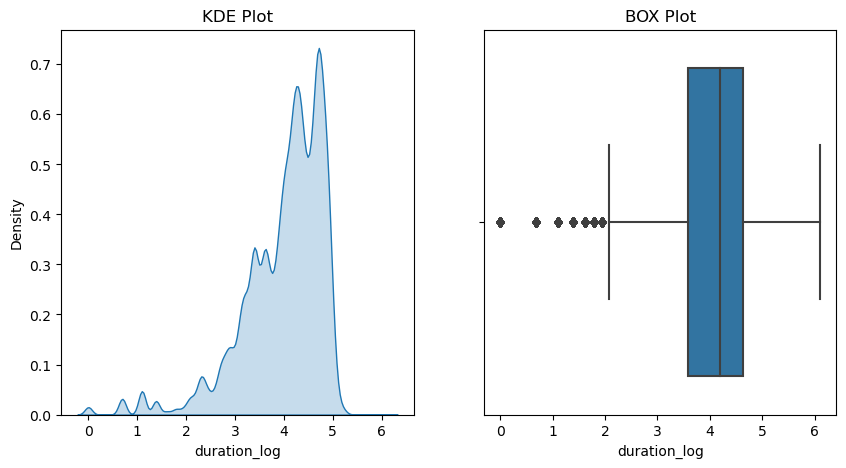

In [30]:
for col in data_1.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data_1[col], shade=True)
    plt.title("KDE Plot")

    plt.subplot(1,2,2)
    sns.boxplot(data_1[col])
    plt.title("BOX Plot")
    plt.show()

In [31]:
data_1.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'duration_log'],
      dtype='object')

## Handling Outliers

In [32]:
# 'width','product_ref', 'quantity tons_log', 'thickness_log','selling_price_log', 'duration_log' - these columns have outliers
# lets cap them

In [33]:
def outliers(data, column):
    iqr = data[column].quantile(0.75)-data[column].quantile(0.25)
    upper_threshold = data[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = data[column].quantile(0.25) - (1.5*iqr)
    data[column] = data[column].clip(lower_threshold,upper_threshold)

In [34]:
outliers(data_1,'width')
outliers(data_1,'product_ref')
outliers(data_1,'quantity tons_log')
outliers(data_1,'thickness_log')
outliers(data_1,'selling_price_log')
outliers(data_1,'duration_log')

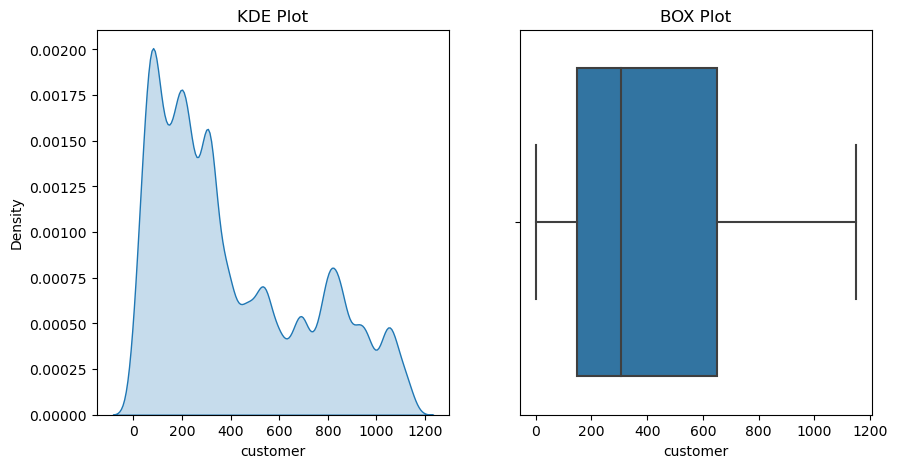

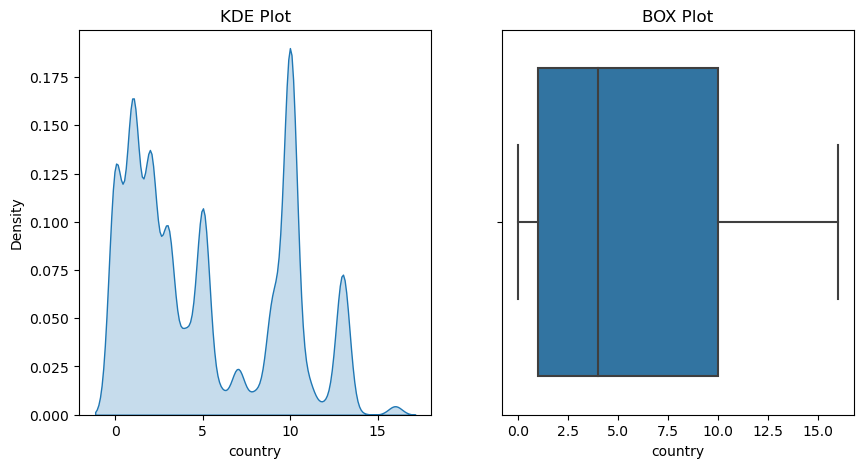

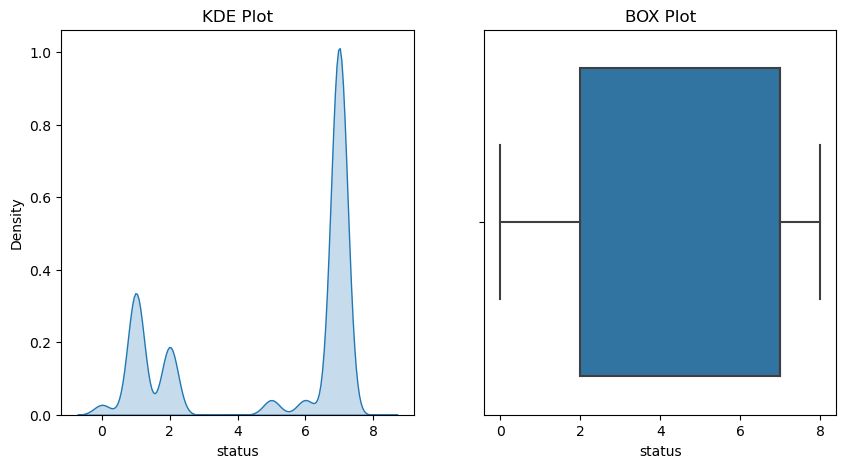

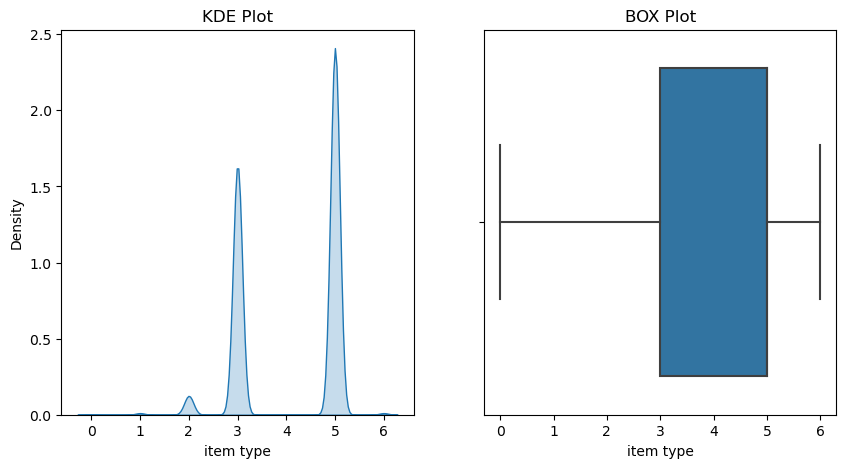

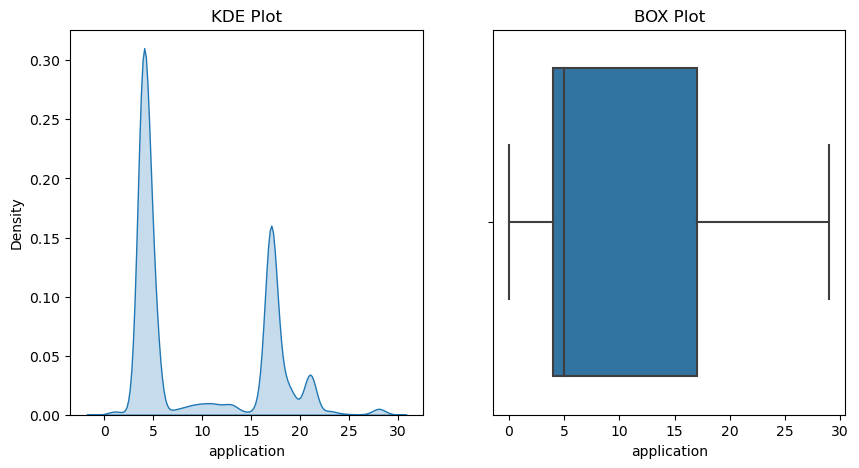

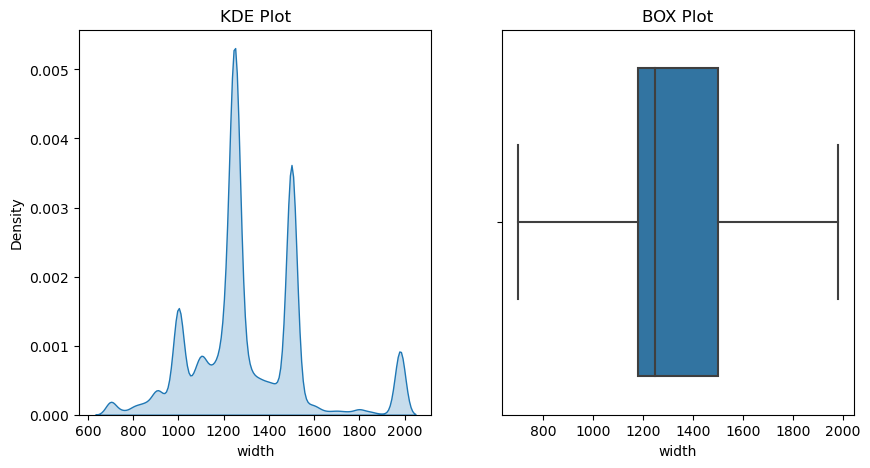

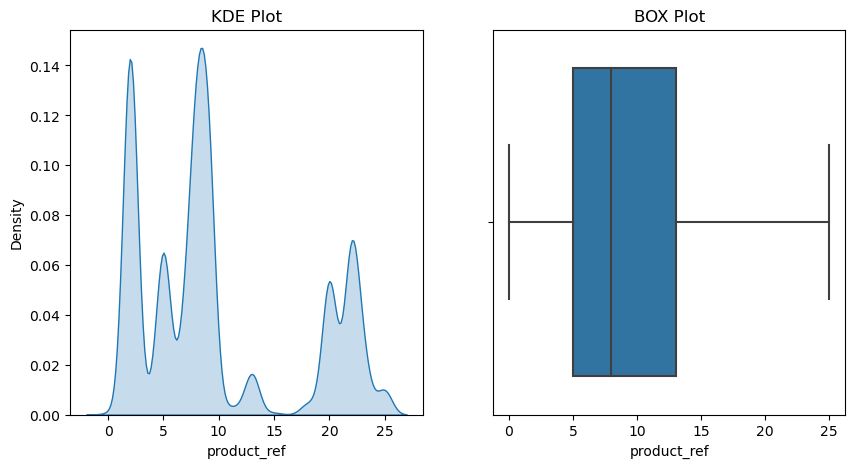

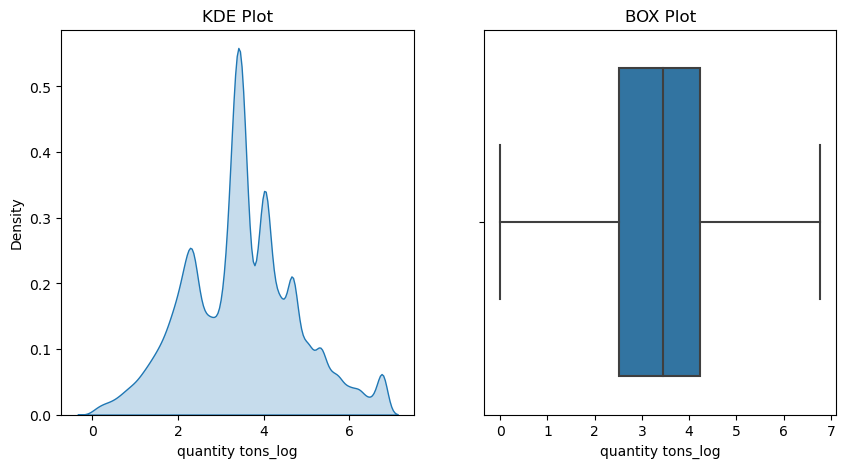

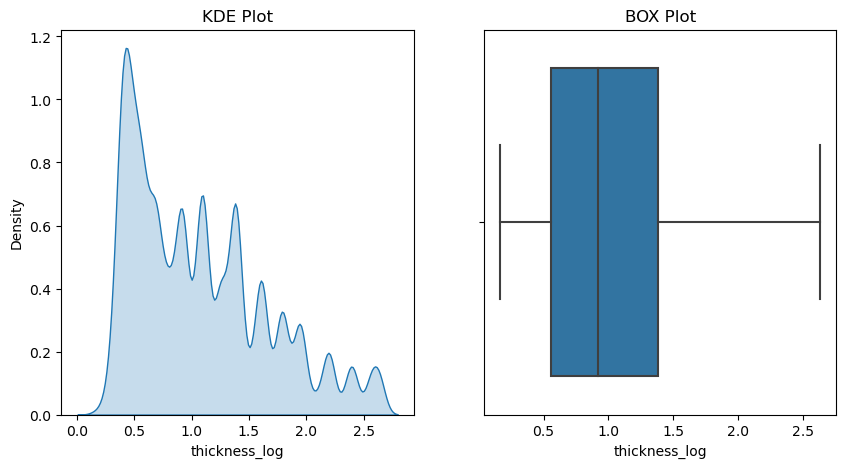

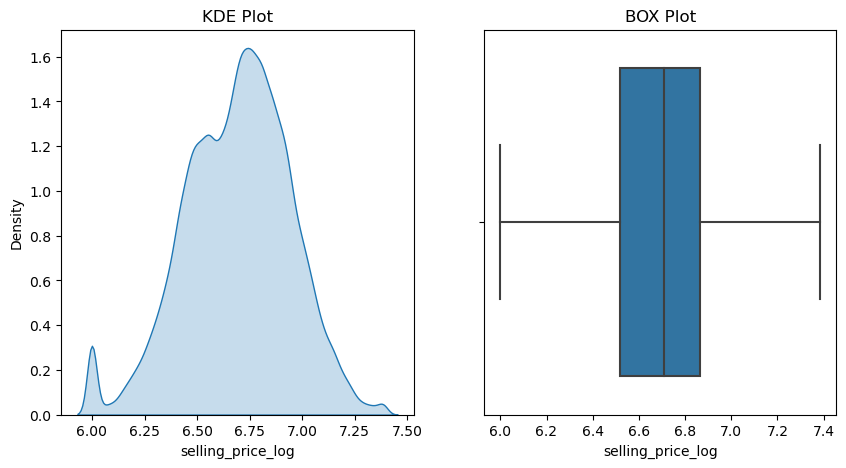

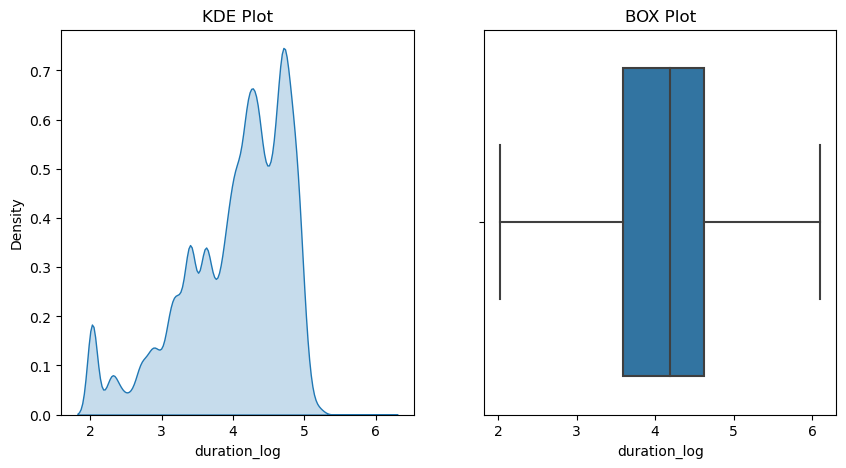

In [35]:
for col in data_1.columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data_1[col], shade=True)
    plt.title("KDE Plot")

    plt.subplot(1,2,2)
    sns.boxplot(data_1[col])
    plt.title("BOX Plot")
    plt.show()

## Correlation Check

<AxesSubplot:>

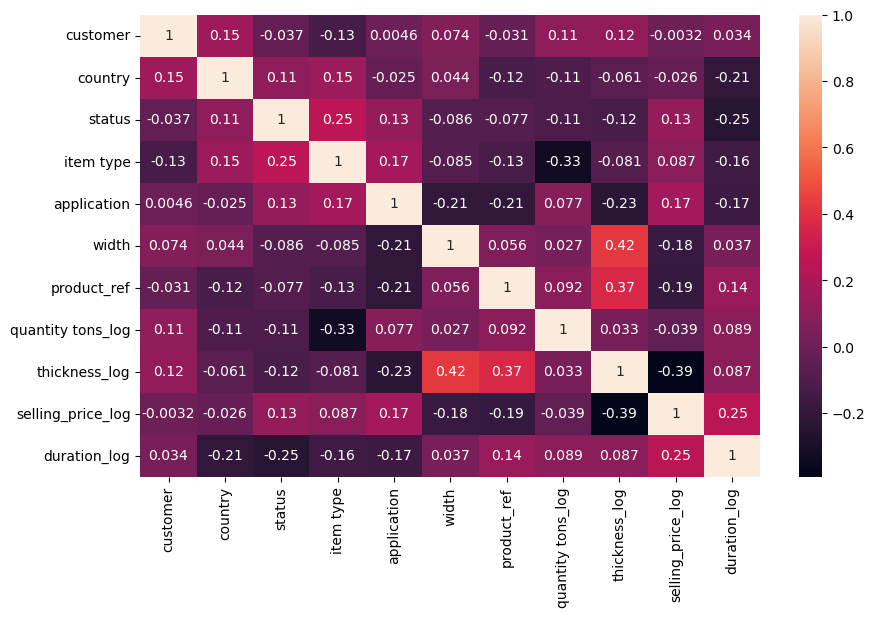

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data_1.corr(), annot=True)

In [37]:
# The correlation is not greater than 0.8 or 0.9 anywhere.

## Model Building

In [38]:
data_1

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,duration_log
0,49,3,7,5,4,1500.0,22.0,4.010077,1.098612,6.751101,4.521789
1,285,0,7,5,17,1210.0,20.0,6.645123,0.587787,6.954639,2.021338
5,285,0,7,5,17,1265.0,20.0,5.424027,0.916291,6.891626,2.021338
6,360,4,0,5,17,1125.0,2.0,1.509090,0.322083,5.999032,4.521789
8,860,6,7,3,4,1275.0,18.0,4.249521,0.470004,7.218177,4.521789
...,...,...,...,...,...,...,...,...,...,...,...
181433,473,0,1,3,5,1980.0,8.0,3.503035,1.945910,6.315358,3.433987
181525,95,4,1,3,4,1525.0,8.0,4.211112,1.578979,6.129050,3.433987
181527,95,4,1,3,4,1525.0,8.0,4.172224,1.924249,6.126869,3.433987
181529,95,4,1,3,4,1500.0,8.0,4.043552,2.180417,6.129050,3.433987


In [39]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165560 entries, 0 to 181531
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer           165560 non-null  int64  
 1   country            165560 non-null  int64  
 2   status             165560 non-null  int32  
 3   item type          165560 non-null  int32  
 4   application        165560 non-null  int64  
 5   width              165560 non-null  float64
 6   product_ref        165560 non-null  float64
 7   quantity tons_log  165560 non-null  float64
 8   thickness_log      165560 non-null  float64
 9   selling_price_log  165560 non-null  float64
 10  duration_log       165560 non-null  float64
dtypes: float64(6), int32(2), int64(3)
memory usage: 17.9 MB


In [40]:
data_1.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'duration_log'],
      dtype='object')

In [41]:
data['customer'].nunique()

1150

In [42]:
x = data_1.drop('selling_price_log', axis=1)
y = data_1['selling_price_log']

In [43]:
x.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log', 'duration_log'],
      dtype='object')

In [44]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165560 entries, 0 to 181531
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer           165560 non-null  int64  
 1   country            165560 non-null  int64  
 2   status             165560 non-null  int32  
 3   item type          165560 non-null  int32  
 4   application        165560 non-null  int64  
 5   width              165560 non-null  float64
 6   product_ref        165560 non-null  float64
 7   quantity tons_log  165560 non-null  float64
 8   thickness_log      165560 non-null  float64
 9   duration_log       165560 non-null  float64
dtypes: float64(5), int32(2), int64(3)
memory usage: 16.7 MB


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x,y)

RandomForestRegressor()

In [133]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, rf.predict(x))

0.0005762788399781782

In [134]:
imp =pd.DataFrame(rf.feature_importances_,index=rf.feature_names_in_, columns=['val'])
imp.sort_values('val', ascending= False)

,val
product_ref,0.293217
duration_log,0.237557
status,0.178235
country,0.075227
customer,0.065679
thickness_log,0.045166
quantity tons_log,0.043944
application,0.025655
width,0.018034
item type,0.017286


In [135]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [136]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
mean_squared_error(y_test,rf.predict(x_test))

0.004843464159262083

In [137]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,rf.predict(x_test))

0.004843464159262083

In [138]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
mean_squared_error(y_test,gb.predict(x_test))

0.019847129743402855

In [139]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
mean_squared_error(y_test,ab.predict(x_test))

0.02904252143379978

In [140]:
# xgboost
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
xb = xgb.XGBRegressor()
xb.fit(x_train,y_train)
mean_squared_error(y_test,xb.predict(x_test))

0.009706275380749738

In [141]:
from pycaret.regression import *

setup( x ,target=y)

,Description,Value
0,Session id,8922
1,Target,selling_price_log
2,Target type,Regression
3,Original data shape,"(165560, 11)"
4,Transformed data shape,"(165560, 11)"
5,Transformed train set shape,"(115891, 11)"
6,Transformed test set shape,"(49669, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [142]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0419,0.0047,0.0685,0.9255,0.0089,0.0063,18.6530
rf,Random Forest Regressor,0.0446,0.0051,0.0711,0.9200,0.0092,0.0066,26.0120
dt,Decision Tree Regressor,0.0526,0.0093,0.0962,0.8533,0.0125,0.0078,0.3820
xgboost,Extreme Gradient Boosting,0.0751,0.0101,0.1003,0.8407,0.0130,0.0112,0.5770
catboost,CatBoost Regressor,0.0797,0.0109,0.1046,0.8265,0.0136,0.0119,10.9710
lightgbm,Light Gradient Boosting Machine,0.0913,0.0138,0.1174,0.7817,0.0153,0.0137,0.6310
gbr,Gradient Boosting Regressor,0.1133,0.0201,0.1417,0.6821,0.0185,0.0170,7.7720
knn,K Neighbors Regressor,0.1094,0.0240,0.1550,0.6193,0.0203,0.0164,0.3060
ada,AdaBoost Regressor,0.1410,0.0292,0.1708,0.5380,0.0223,0.0212,3.9450
ridge,Ridge Regression,0.1650,0.0455,0.2133,0.2792,0.0280,0.0249,0.0740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=8922)

In [196]:
# As randomforest is giving the best result, lets go with that

import pickle
with open('model.pkl', 'wb') as m:
    pickle.dump(rf, m)

In [144]:
data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.0,91.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.0,0.0
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-04-01,983.0,0.0
6,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,2021-07-01,18.0,91.0
8,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,2021-07-01,1363.0,91.0


In [197]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,165560.0,6134.483199,2.457663e+06,0.00001,11.38165,30.541361,67.05384,1.000000e+09
thickness,165560.0,2.622340,6.841369e+00,0.18000,0.74000,1.500000,3.00000,2.500000e+03
width,165560.0,1300.922870,2.620186e+02,1.00000,1180.00000,1250.000000,1500.00000,2.990000e+03
selling_price,165560.0,1427.608490,2.457669e+05,0.10000,677.00000,817.000000,958.00000,1.000010e+08
duration,165560.0,68.099070,3.928420e+01,0.00000,35.00000,65.000000,101.00000,4.480000e+02


In [145]:
data_1.head()

,customer,country,status,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,duration_log
0,49,3,7,5,4,1500.0,22.0,4.010077,1.098612,6.751101,4.521789
1,285,0,7,5,17,1210.0,20.0,6.645123,0.587787,6.954639,2.021338
5,285,0,7,5,17,1265.0,20.0,5.424027,0.916291,6.891626,2.021338
6,360,4,0,5,17,1125.0,2.0,1.509090,0.322083,5.999032,4.521789
8,860,6,7,3,4,1275.0,18.0,4.249521,0.470004,7.218177,4.521789


In [198]:
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,165560.0,406.688663,312.198547,0.000000,148.000000,308.000000,651.000000,1149.000000
country,165560.0,5.162201,4.290472,0.000000,1.000000,4.000000,10.000000,16.000000
status,165560.0,5.015306,2.682111,0.000000,2.000000,7.000000,7.000000,8.000000
item type,165560.0,4.120325,1.050843,0.000000,3.000000,5.000000,5.000000,6.000000
application,165560.0,9.760202,6.782590,0.000000,4.000000,5.000000,17.000000,29.000000
width,165560.0,1302.064225,250.849239,700.000000,1180.000000,1250.000000,1500.000000,1980.000000
product_ref,165560.0,9.855647,7.273423,0.000000,5.000000,8.000000,13.000000,25.000000
quantity tons_log,165560.0,3.474545,1.293706,0.000010,2.516216,3.451300,4.220299,6.776425
thickness_log,165560.0,1.069249,0.595947,0.165514,0.553885,0.916291,1.386294,2.634908
selling_price_log,165560.0,6.690945,0.251666,5.999032,6.519147,6.706862,6.865891,7.386007


In [169]:
data.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.0,91.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.0,0.0
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-04-01,983.0,0.0
6,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,2021-07-01,18.0,91.0
8,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,2021-07-01,1363.0,91.0


In [170]:
data_2 = data.copy()

In [147]:
data_1.columns

Index(['customer', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'duration_log'],
      dtype='object')

In [161]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165560 entries, 0 to 181531
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      165560 non-null  datetime64[ns]
 1   quantity tons  165560 non-null  float64       
 2   customer       165560 non-null  int64         
 3   country        165560 non-null  int64         
 4   status         165560 non-null  int32         
 5   item type      165560 non-null  int32         
 6   application    165560 non-null  int64         
 7   thickness      165560 non-null  float64       
 8   width          165560 non-null  float64       
 9   product_ref    165560 non-null  int64         
 10  delivery date  165560 non-null  datetime64[ns]
 11  selling_price  165560 non-null  float64       
 12  duration       165560 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int32(2), int64(4)
memory usage: 20.5 MB


In [171]:
data_2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,duration
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.0,91.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.0,0.0
5,2021-04-01,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,1668701718,2021-04-01,983.0,0.0
6,2021-04-01,3.522613,30209509.0,30.0,Draft,W,41.0,0.38,1125.0,611993,2021-07-01,18.0,91.0
8,2021-04-01,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,1668701376,2021-07-01,1363.0,91.0


In [172]:
cat_col = ['customer', 'country', 'status', 'item type', 'application','product_ref']

In [174]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label_mapping = {}

for i in cat_col:
    data_2[i] = le.fit_transform(data_2[i])
    label_mapping[i+"_labels"] = dict(zip(le.classes_, range(len(le.classes_)) ))

    

In [193]:
label_mapping.keys()

dict_keys(['customer_labels', 'country_labels', 'status_labels', 'item type_labels', 'application_labels', 'product_ref_labels'])

In [177]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
      dtype=int64)

In [195]:
label_mapping['status_labels']

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8}

In [151]:
#import pickle
#with open("label_mapping.pkl", 'wb') as f:
 #   pickle.dump(label_mapping, f)

In [152]:
#with open('label_mapping.pkl', 'rb') as f:
 #   label_mapping1 = pickle.load(f)

In [153]:
label_mapping1.keys()

dict_keys(['customer_labels', 'country_labels', 'status_labels', 'item type_labels', 'application_labels', 'product_ref_labels'])

In [208]:
label_mapping.keys()

dict_keys(['customer_labels', 'country_labels', 'status_labels', 'item type_labels', 'application_labels', 'product_ref_labels'])

In [209]:
label_mapping1['status_labels']

{'Draft': 0,
 'Lost': 1,
 'Not lost for AM': 2,
 'Offerable': 3,
 'Offered': 4,
 'Revised': 5,
 'To be approved': 6,
 'Won': 7,
 'Wonderful': 8}

In [206]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if value == val:
            return key

In [207]:
get_key(label_mapping1['status_labels'], 3)

'Offerable'

In [ ]:
data_2.select_dtypes('category').columns.values

array(['customer', 'country', 'status', 'item type', 'application',
       'product_ref'], dtype=object)

In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165560 entries, 0 to 181531
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      165560 non-null  datetime64[ns]
 1   quantity tons  165560 non-null  float64       
 2   customer       165560 non-null  category      
 3   country        165560 non-null  category      
 4   status         165560 non-null  category      
 5   item type      165560 non-null  category      
 6   application    165560 non-null  category      
 7   thickness      165560 non-null  float64       
 8   width          165560 non-null  float64       
 9   product_ref    165560 non-null  category      
 10  delivery date  165560 non-null  datetime64[ns]
 11  selling_price  165560 non-null  float64       
 12  duration       165560 non-null  float64       
dtypes: category(6), datetime64[ns](2), float64(5)
memory usage: 15.3 MB


## Classifier

In [199]:
x = data_1.drop(['status'], axis=1)
y = data_1['status']

In [179]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [180]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
accuracy_score(y_test,rfc.predict(x_test))

0.9327937505033422

In [202]:
rfc.predict(x_test)

array([1, 7, 1, ..., 7, 7, 7])

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
accuracy_score(y_test,gbc.predict(x_test))

0.7352822743013611

In [182]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
accuracy_score(y_test,abc.predict(x_test))

0.6314125795280664

In [183]:
# xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
xbc = xgb.XGBClassifier()
xbc.fit(x_train,y_train)
accuracy_score(y_test,xbc.predict(x_test))

0.8630103889828461

In [184]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [214]:
with open("class_model.pkl", 'wb') as f:
    pickle.dump(rfc,f)

In [212]:
rfc.predict(np.array([49,3,5,4,1500.0,22.0,4.010077,1.098612,6.751101,4.521789]).reshape(1,-1))

array([7])

In [200]:
x.head()

,customer,country,item type,application,width,product_ref,quantity tons_log,thickness_log,selling_price_log,duration_log
0,49,3,5,4,1500.0,22.0,4.010077,1.098612,6.751101,4.521789
1,285,0,5,17,1210.0,20.0,6.645123,0.587787,6.954639,2.021338
5,285,0,5,17,1265.0,20.0,5.424027,0.916291,6.891626,2.021338
6,360,4,5,17,1125.0,2.0,1.509090,0.322083,5.999032,4.521789
8,860,6,3,4,1275.0,18.0,4.249521,0.470004,7.218177,4.521789


In [201]:
x.columns

Index(['customer', 'country', 'item type', 'application', 'width',
       'product_ref', 'quantity tons_log', 'thickness_log',
       'selling_price_log', 'duration_log'],
      dtype='object')

In [ ]:
from pycaret.classification import *

setup( x ,target=y)

In [ ]:
compare_models()

In [ ]:
# As randomforest is giving the best results, lets apply some hyperparameters and try to get good results

from sklearn.model_selection import GridSearchCV, KFold
kf = KFold(n_splits=5)

hyper_params = { "criterion" : [ 'gini', 'entropy' ],
                "max_depth" : range(2,11),
                "min_samples_split" : range(2,6),
                'max_features' : np.linspace(0.5,1,6)
}

randfor = RandomForestClassifier()

gcv = GridSearchCV(randfor,param_grid=hyper_params, cv= kf, scoring='accuracy')
gcv.fit(x,y)
print(gcv.best_params_, gcv.best_score_)
